In [119]:
import json
import itertools
import pandas as pd

import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 9) #set figsize for all

import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=False)

In [109]:
with open('data/train.json') as data:
  dishes = json.load(data)

In [115]:
print("There are {0} total recipes.".format(len(dishes)))
dishes[0]

There are 39774 total recipes.


{'id': 10259,
 'cuisine': 'greek',
 'ingredients': ['romaine lettuce',
  'black olives',
  'grape tomatoes',
  'garlic',
  'pepper',
  'purple onion',
  'seasoning',
  'garbanzo beans',
  'feta cheese crumbles']}

In [117]:
pd.DataFrame.from_dict(dishes)['cuisine'].value_counts()

italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: cuisine, dtype: int64

In [111]:
def get_combinations(l):
    '''input list of items and output all pair edges'''
    g = []
    for i in itertools.combinations(l ,2):
        g.append(i)
    return g

In [113]:
new_dict = []

for dish in dishes:
    edges_list = get_combinations(dish['ingredients'])
    for edges in edges_list:
        new_dict.append({'id':dish['id'], 'cuisine':dish['cuisine'], 'source': edges[0], 'target': edges[1]})  

In [121]:
edge_df = pd.DataFrame.from_dict(new_dict)

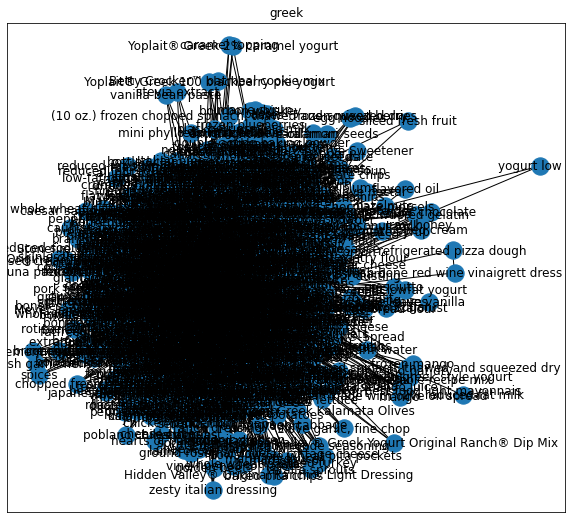

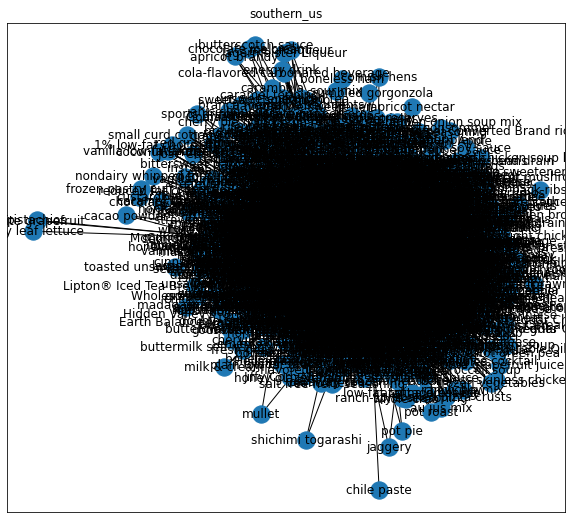

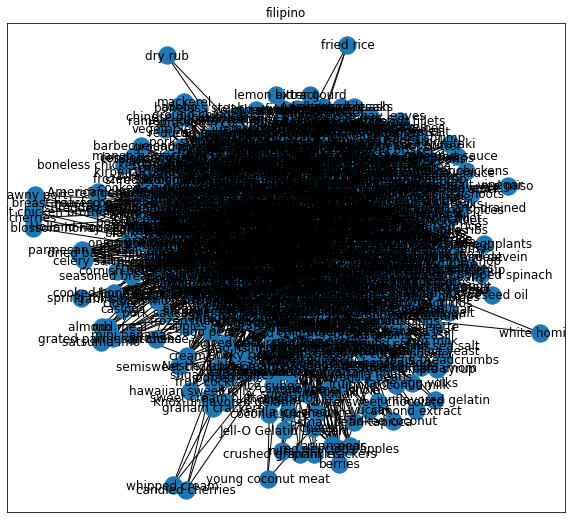

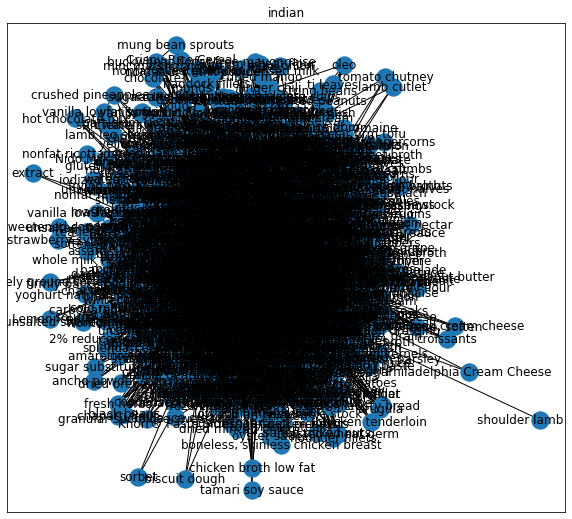

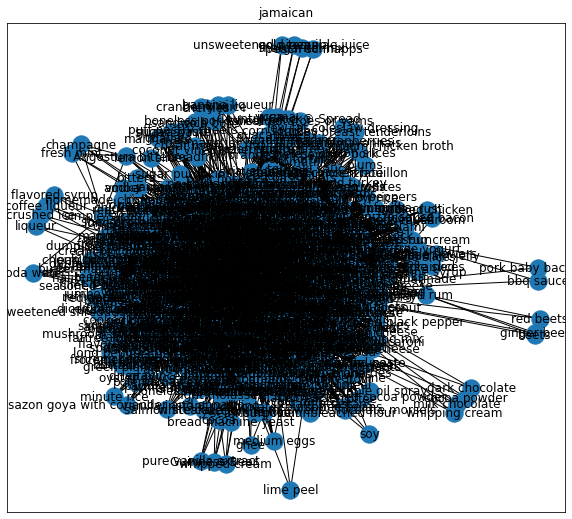

KeyboardInterrupt: 

In [125]:
# for i in edge_df['cuisine'].unique():
#     G = nx.from_pandas_edgelist(edge_df[edge_df['cuisine'] == i], source = 'source', target = 'target')
#     nx.draw_networkx(G)
#     plt.title(i)
#     plt.show()